In [ ]:
import numpy as np # for handling numbers
import pandas as pd # for handling the dataset
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DTSC 620/spam.csv')

In [ ]:
data.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        4601 non-null   float64
 1   address     4601 non-null   float64
 2   all         4601 non-null   float64
 3   3d          4601 non-null   float64
 4   our         4601 non-null   float64
 5   over        4601 non-null   float64
 6   remove      4601 non-null   float64
 7   internet    4601 non-null   float64
 8   order       4601 non-null   float64
 9   mail        4601 non-null   float64
 10  receive     4601 non-null   float64
 11  will        4601 non-null   float64
 12  people      4601 non-null   float64
 13  report      4601 non-null   float64
 14  addresses   4601 non-null   float64
 15  free        4601 non-null   float64
 16  business    4601 non-null   float64
 17  email       4601 non-null   float64
 18  you         4601 non-null   float64
 19  credit      4601 non-null  

In [ ]:
data.describe()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


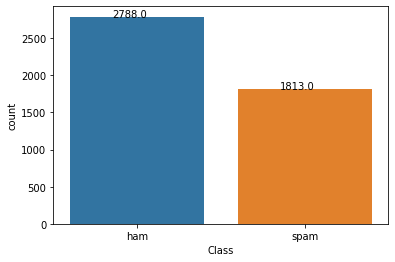

In [ ]:
ax = sns.countplot(x="Class", data=data)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

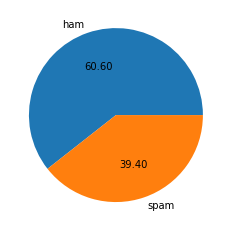

In [ ]:
import matplotlib.pyplot as plt 
plt.pie(data['Class'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
data['Class'].describe()

count     4601
unique       2
top        ham
freq      2788
Name: Class, dtype: object

In [ ]:
#might be the reason why adaboost has a lower accuracy than random forest
data.Class.replace(('spam', 'ham'), (1, 0), inplace=True) #did not want to import an encoder

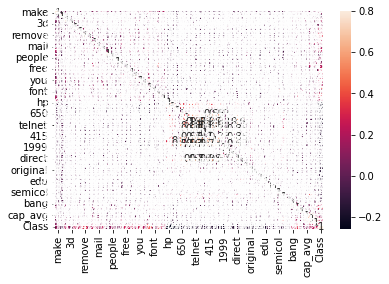

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,vmax = .8, annot=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


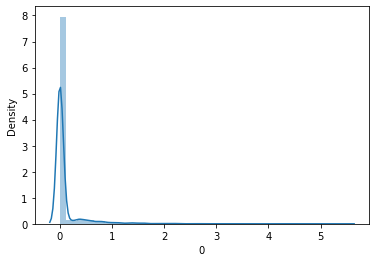

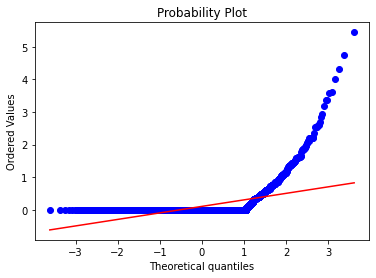

In [ ]:
#histogram and normal probability plot
sns.distplot(data['0']);
fig = plt.figure()
res = stats.probplot(data['0'], plot=plt)

In [ ]:
data.columns

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '0',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound',
       'cap_avg', 'cap_long', 'cap_total', 'Class'],
      dtype='object')

In [ ]:
data.isna().sum()

make          0
address       0
all           0
3d            0
our           0
over          0
remove        0
internet      0
order         0
mail          0
receive       0
will          0
people        0
report        0
addresses     0
free          0
business      0
email         0
you           0
credit        0
your          0
font          0
0             0
money         0
hp            0
hpl           0
george        0
650           0
lab           0
labs          0
telnet        0
857           0
data          0
415           0
85            0
technology    0
1999          0
parts         0
pm            0
direct        0
cs            0
meeting       0
original      0
project       0
re            0
edu           0
table         0
conference    0
semicol       0
paren         0
bracket       0
bang          0
dollar        0
pound         0
cap_avg       0
cap_long      0
cap_total     0
Class         0
dtype: int64

In [ ]:
data.duplicated().sum()

391

In [ ]:
data.drop_duplicates()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,0
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,0
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,0
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,1
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.00,0.72,0.00,0.0,2.89,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.379,7,40,1
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.000,0.101,0.0,0.000,0.000,0.00,1.857,16,52,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.443,0.0,0.221,0.665,0.00,3.812,15,61,1
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.218,0.0,0.218,0.000,0.00,1.687,10,27,0


In [ ]:
data.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,0
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,0
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,0
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,1
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,1


In [ ]:
# model metrics to see affectiveness of model
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve, accuracy_score, precision_score

In [ ]:
#@title single method/function for model metrics visualization
def report(model):
    preds = model.predict(X_test)
    print(accuracy_score(y_test,preds))
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    #plot_precision_recall_curve(model,X_test,y_test)
    #plot_roc_curve(model,X_test,y_test)

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#@title to have 1000 train cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7826, random_state=10, shuffle=False)
#Compare their accuracies with the following training-test splits: 50%-50%, 60%-40%, 70%-30%, and 80%-20%

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()
gnb = GaussianNB()

#@title voting classifier
vc = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('gnb', gnb)], voting='hard')
vc = vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#@title Random Classifier model
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)
y_pred_rfc = rfc_model.predict(X_test)

In [ ]:
#@title AdaBoost model
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_abc = ada.predict(X_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7826, random_state=10, shuffle=False)

print("With a test-train split of 78-22%")
print("Adaboost                           accuracy:",accuracy_score(y_test, y_pred_abc))
print("Random Forest Classifier           accuracy:",accuracy_score(y_test, y_pred_rfc))
print("Majority Voting                    accuracy:",accuracy_score(y_test, y_pred_vc))



With a test-train split of 78-22%
Adaboost                           accuracy: 0.9197445154123854
Random Forest Classifier           accuracy: 0.9361288530963621
Majority Voting                    accuracy: 0.9164121077478479


In [ ]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2205
           1       0.89      0.90      0.90      1396

    accuracy                           0.92      3601
   macro avg       0.91      0.92      0.92      3601
weighted avg       0.92      0.92      0.92      3601



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

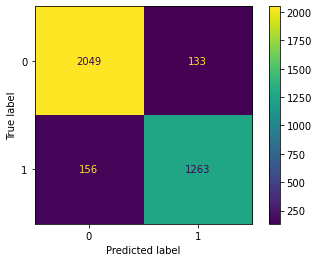

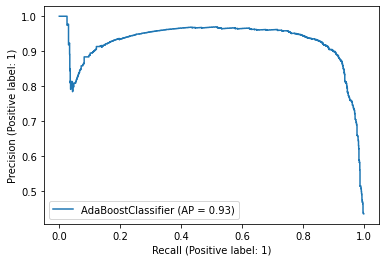

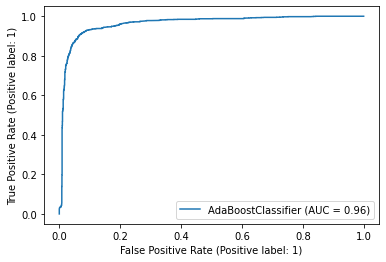

In [ ]:
report(ada)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2236
           1       0.90      0.94      0.92      1365

    accuracy                           0.94      3601
   macro avg       0.93      0.94      0.93      3601
weighted avg       0.94      0.94      0.94      3601



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

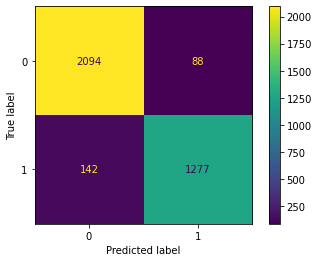

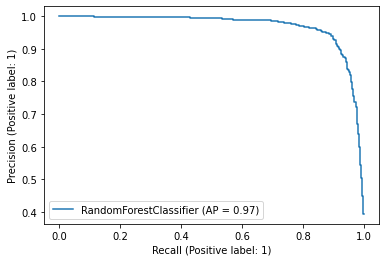

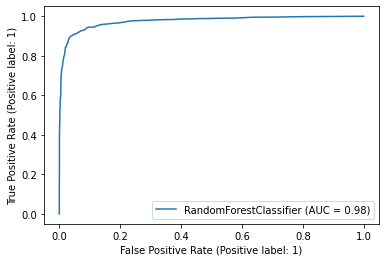

In [ ]:
report(rfc_model)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


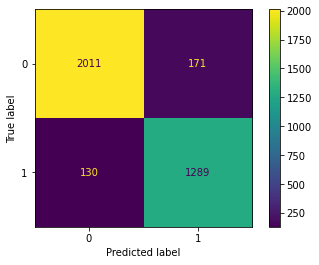

In [ ]:
plot_confusion_matrix(vc,X_test,y_test)

In [ ]:
'''
Adaboost has a lower accuracy than random forest classifier
1. overfitting to training data
2. AdaBoost minimizes an exponential loss. 
3. Noisy data and outliers have to be avoided before adopting an Adaboost algorithm.
4. If you are measuring the performance using some other measure (e.g. 0-1 classification loss) 
then the mis-match between training and the test loss may be the reason. This becomes more likely 
if you have outliers in your training data (that is, samples that are either labeled incorrectly 
in the training data or are hard for your classifier)'''

'\nAdaboost has a lower accuracy than random forest classifier\n1. overfitting to training data\n2. AdaBoost minimizes an exponential loss. \n3. Noisy data and outliers have to be avoided before adopting an Adaboost algorithm.\n4. If you are measuring the performance using some other measure (e.g. 0-1 classification loss) \nthen the mis-match between training and the test loss may be the reason. This becomes more likely \nif you have outliers in your training data (that is, samples that are either labeled incorrectly \nin the training data or are hard for your classifier)'

In [ ]:
#detect and remove noise and outliers

In [ ]:
def compare_test_trains(num):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= num, random_state=10)
  #voting classifier
  vc = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('gnb', gnb)], voting='hard')
  vc = vc.fit(X_train, y_train)
  y_pred_vc = vc.predict(X_test)
  #Random Classifier model
  rfc_model = RandomForestClassifier()
  rfc_model.fit(X_train,y_train)
  y_pred_rfc = rfc_model.predict(X_test)
  # AdaBoost model
  abc = AdaBoostClassifier()
  abc.fit(X_train, y_train)
  y_pred_abc = abc.predict(X_test)
  comparer(num, accuracy_score(y_test, y_pred_abc), accuracy_score(y_test, y_pred_rfc),accuracy_score(y_test, y_pred_vc))

def comparer(split, abc, rfc, vc):
  print("With a test-train split of", str(split*100),"-", str((1-split)*100))
  print("Adaboost                           :", abc)
  print("Random Forest Classifier           :", rfc)
  print("Majority Voting                    :", vc)


In [ ]:
# training-test splits: 50%-50%, 60%-40%, 70%-30%, and 80%-20%
list_test_size = [0.5, 0.4, 0.3, 0.2]
compare_test_trains(0.5)
'''
the model is overfitted?
'''

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


With a test-train split of 50.0 - 50.0
Adaboost                           : 0.9313342025206433
Random Forest Classifier           : 0.9430682312038244
Majority Voting                    : 0.9326379834854411


'\nthe model is overfitted?\n'

In [ ]:
for i in list_test_size:
  compare_test_trains(i)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


With a test-train split of 50.0 - 50.0
Adaboost                           : 0.9313342025206433
Random Forest Classifier           : 0.9452411994784876
Majority Voting                    : 0.9335071707953064


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


With a test-train split of 40.0 - 60.0
Adaboost                           : 0.9364475828354155
Random Forest Classifier           : 0.9478544269418794
Majority Voting                    : 0.9342748506246605


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


With a test-train split of 30.0 - 70.0
Adaboost                           : 0.9377262853005068
Random Forest Classifier           : 0.9500362056480811
Majority Voting                    : 0.9283128167994207


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


With a test-train split of 20.0 - 80.0
Adaboost                           : 0.9467969598262758
Random Forest Classifier           : 0.9565689467969598
Majority Voting                    : 0.9250814332247557


In [ ]:
compare_test_trains(0.1)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


With a test-train split of 10.0 - 90.0
Adaboost                           : 0.9522776572668112
Random Forest Classifier           : 0.9566160520607375
Majority Voting                    : 0.928416485900217


In [ ]:
'''
larger the training size the more the adaboost accuracy
'''

'\nlarger the training size the more the adaboost accuracy\n'

In [ ]:
pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 506 kB/s 


In [ ]:
import dtreeviz.trees

In [ ]:
data_viz = DecisionTreeClassifier(max_depth=5,random_state=43)
data_viz.fit(X_train, y_train)
tree_viz1 = dtreeviz.trees.dtreeviz(data_viz, X_train,y_train, target_name='Spam', feature_names= X_train.columns,class_names=['Spam','Ham'])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


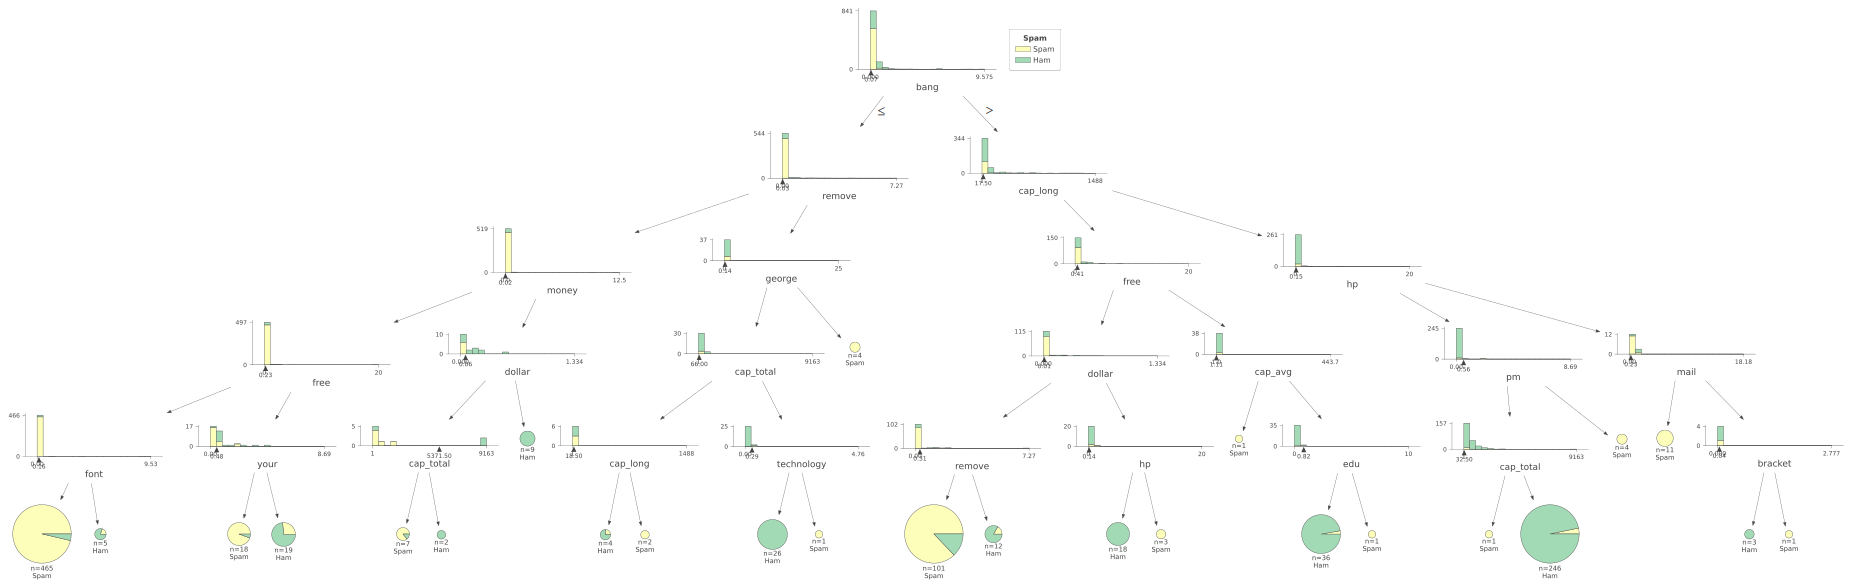

In [ ]:
tree_viz1

In [ ]:
data2 = data.drop(columns = ['bang', 'remove', 'cap_long', 'money', 'george', 'free', 'hp', '3d'])
data2.drop_duplicates()
Xnew = data2.iloc[:,:-1]
Ynew = data2.iloc[:,:-1]
#X_train, X_test, y_train, y_test = train_test_split(Xnew, Ynew, test_size = 0.7826, random_state=10, shuffle=False)

#voting classifier
vc = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('gnb', gnb)], voting='hard')
vc = vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)

#Random Classifier Model
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)
y_pred_rfc = rfc_model.predict(X_test)

#Adaboost Model
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_abc = ada.predict(X_test)

print("With a test-train split of 78-22%")
print("Adaboost                           accuracy:",accuracy_score(y_test, y_pred_abc))
print("Random Forest Classifier           accuracy:",accuracy_score(y_test, y_pred_rfc))
print("Majority Voting                    accuracy:",accuracy_score(y_test, y_pred_vc))

ValueError: ignored